
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sebascarag/AI-SyntheticSound/blob/main/EDA%20Urbansound8k.ipynb)

Importar librerías base

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Descargar dataset UrbandSound8K desde Kaggle.

Para más información sobre la descarga de datasets desde Kaggle ver notebook [Download Kaggle Dataset](https://github.com/sebascarag/AI-SyntheticSound/blob/main/Download%20Kaggle%20Dataset.ipynb)

In [2]:
!pip install kaggle
import os

!mkdir ~/.kaggle # crear carpeta en root
# Cargar archivos desde el equipo local
if not os.path.exists("/root/.kaggle/kaggle.json"):
  from google.colab import files
  files.upload();
  !cp kaggle.json ~/.kaggle/ #copiar token hacia la carpeta creada
  !chmod 600 ~/.kaggle/kaggle.json # asigna el permiso necesario

# descargar dataset
if not os.path.exists("/content/urbansound8k"):
  import kaggle
  kaggle.api.authenticate()
  kaggle.api.dataset_download_files('chrisfilo/urbansound8k', path='/content/urbansound8k', unzip=True)

Saving kaggle.json to kaggle.json


Leer archivo que contiene los metadatos del dataset UrbanSound8

In [3]:
data = pd.read_csv('/content/urbansound8k/UrbanSound8K.csv')

Observar las primeras filas de la metadata

In [4]:
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


Extraer los identificadores y su representación de la etiquetas de clase

In [5]:
data[["classID", "class"]].drop_duplicates().sort_values(by=['classID'])

,classID,class
22,0,air_conditioner
9,1,car_horn
1,2,children_playing
0,3,dog_bark
196,4,drilling
122,5,engine_idling
106,6,gun_shot
171,7,jackhammer
114,8,siren
94,9,street_music


Calcular la duración de los audio

In [6]:
data['real_duration'] = data['end'] - data['start']

Crear etiquetas según el rango de duración del audio

In [7]:
# data['label_duration'] = round(data['real_duration'])
data['label_duration'] = np.where(data['real_duration'] <= 1, '0-1', '')
data['label_duration'] = np.where((data['real_duration'] > 1) & (data['real_duration'] <= 2), '1-2', data['label_duration'])
data['label_duration'] = np.where((data['real_duration'] > 2) & (data['real_duration'] <= 3), '2-3', data['label_duration'])
data['label_duration'] = np.where(data['real_duration'] > 3, '3-4', data['label_duration'])

data

,slice_file_name,fsID,start,end,salience,fold,classID,class,real_duration,label_duration
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark,0.317551,0-1
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing,4.000000,3-4
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing,4.000000,3-4
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing,4.000000,3-4
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing,4.000000,3-4
...,...,...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn,4.000000,3-4
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn,2.142545,2-3
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn,3.505983,3-4
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn,2.532098,2-3


Generar análisis estadístico descriptivo de la metadata. Incluyen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores NaN.

In [8]:
data.describe()

,fsID,start,end,salience,fold,classID,real_duration
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877,3.607904
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544,0.973570
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000,0.054517
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000,4.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000,4.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000,4.000000


Imprimir información sobre las columnas, los valores no nulos y el uso de memoria.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
 8   real_duration    8732 non-null   float64
 9   label_duration   8732 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 682.3+ KB


Crear histograma que representa la cantidad de audios por clase

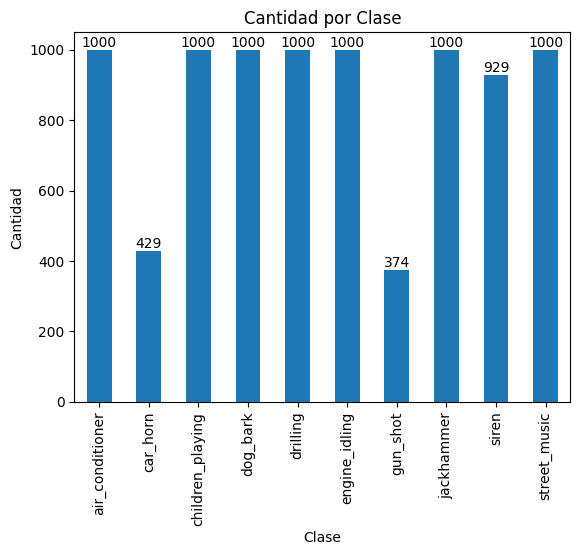

In [23]:
ax = data.groupby("class").count()['classID'].plot.bar(title="Cantidad por Clase", ylabel="Cantidad", xlabel="Clase")

for container in ax.containers:
    ax.bar_label(container)

Calcular la prominencia del audio

In [13]:
# data['label_salience'] = 'primer plano' if data['salience'] == 1 else 'segundo plano'
data['label_salience'] = np.where(data['salience'] == 1, 'primer plano', 'segundo plano')

Crear gráfico de torta con la distrubución porcentual de las prominencias

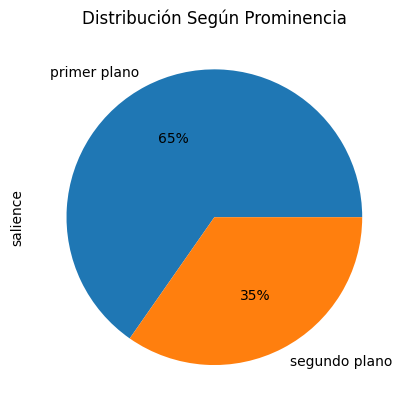

In [20]:
_ = data.groupby("label_salience").count()['salience'].plot.pie(autopct='%1.0f%%', title="Distribución Según Prominencia")

Crear histograma que representa la cantidad de audios por carpeta

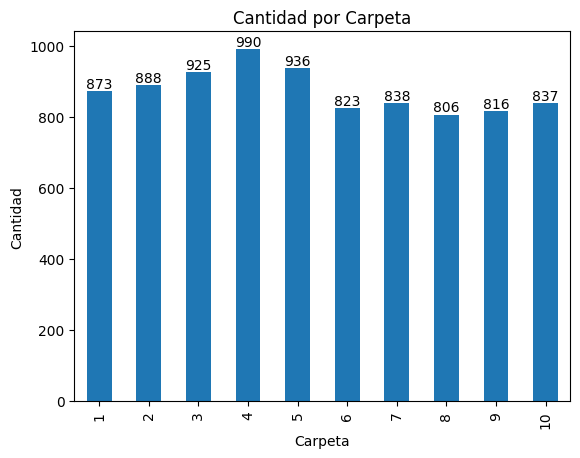

In [21]:
ax = data.groupby("fold").count()['class'].plot.bar(title="Cantidad por Carpeta", ylabel="Cantidad", xlabel="Carpeta")
for container in ax.containers:
    ax.bar_label(container)

Crear histograma que representa la cantidad de audios por etiqueta de duración

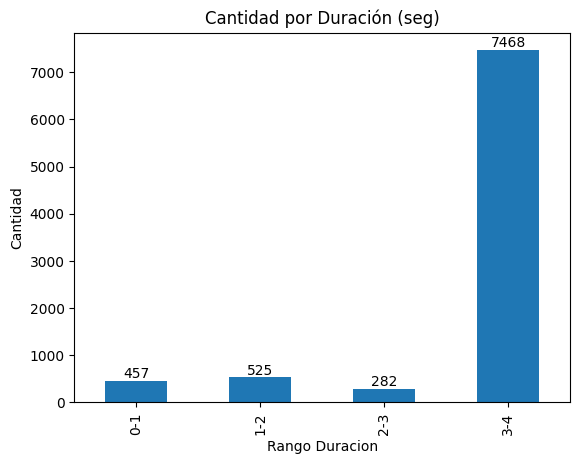

In [22]:
ax = data.groupby("label_duration").count().real_duration.plot.bar(title="Cantidad por Duración (seg)", ylabel="Cantidad", xlabel="Rango Duracion")
for container in ax.containers:
    ax.bar_label(container)

Crear histograma que representa la cantidad de audios por clase y duración menor a 1 segundo

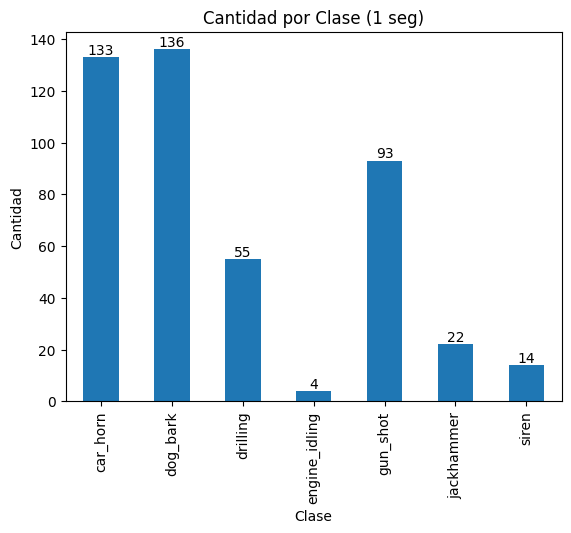

In [24]:
ax = data[data.real_duration <= 1].groupby("class").count().classID.plot.bar(title="Cantidad por Clase (1 seg)", ylabel="Cantidad", xlabel="Clase")
for container in ax.containers:
    ax.bar_label(container)

Crear histograma que representa la cantidad de audios por clase y duración mayor a 4 segundos

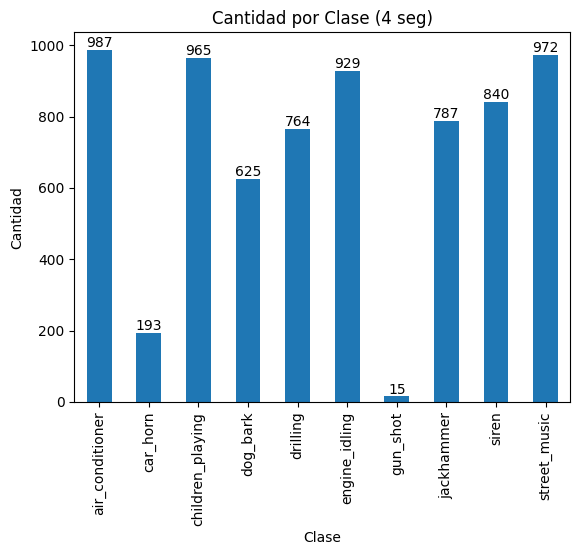

In [25]:
ax = data[data.real_duration >= 4].groupby("class").count().classID.plot.bar(title="Cantidad por Clase (4 seg)", ylabel="Cantidad", xlabel="Clase")
for container in ax.containers:
    ax.bar_label(container)